In [1]:
import pandas as pd
import xlrd
df=pd.read_excel("D:/ICTK-Learning/Python Programing Folder/DSA_Assignments/Telco-Customer-Churn.xlsx")
df

C:\Users\aryar\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare churn count with respect to gender

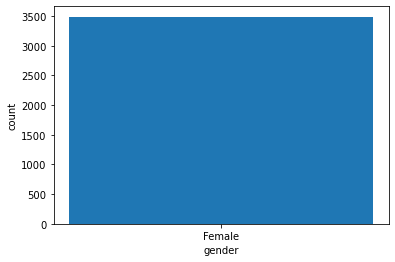

<AxesSubplot:xlabel='gender', ylabel='count'>

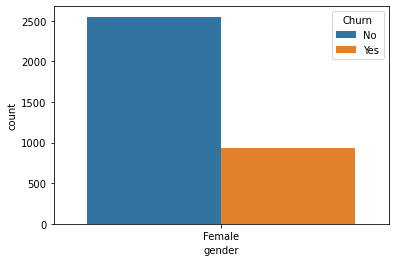

In [16]:
churn_count=df.groupby('gender').count()
plt.bar(churn_count.index.values, churn_count['Churn'])
plt.xlabel('gender')
plt.ylabel('count')
plt.show()
sns.countplot(data=df, x='gender',hue='Churn') 

# Find out how many female senior citizens there in the dataset

<AxesSubplot:xlabel='gender', ylabel='count'>

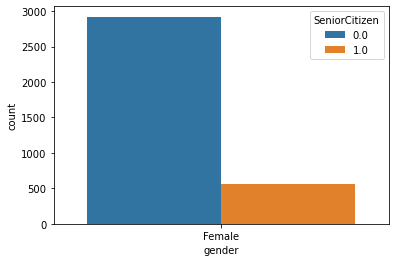

In [17]:
df=df[df.gender == 'Female']
sns.countplot(data=df, x='gender',hue='SeniorCitizen') 

<AxesSubplot:xlabel='gender', ylabel='count'>

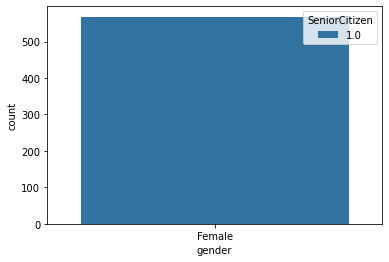

In [18]:
 sc=df[(df['SeniorCitizen']==1) & (df['gender']=='Female')]
    
sns.countplot(data=sc, x='gender',hue='SeniorCitizen') 

# Compare 'tenure' with 'Total Charges'


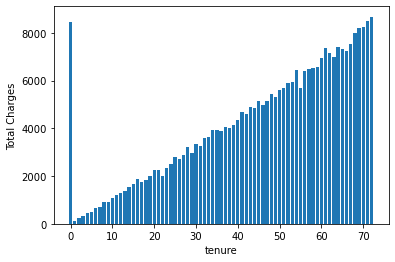

In [19]:
plt.bar(df['tenure'],df['TotalCharges'],)
plt.xlabel("tenure")
plt.ylabel("Total Charges")
plt.show()

# Find out which contract is preferred by the senior citizen.


In [35]:
df1= df[df["SeniorCitizen"]==1]
cnt=df1.groupby(by=['Contract']).sum()
cnt['SeniorCitizen']


Contract
Month-to-month    399.0
One year          101.0
Two year           68.0
Name: SeniorCitizen, dtype: float64

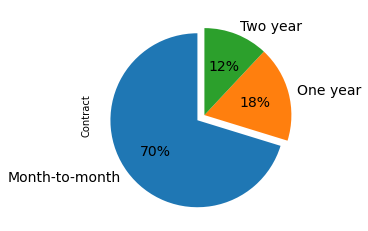

In [47]:
explode=( 0.1,0,0)
df1.Contract.value_counts().plot.pie(fontsize=14,startangle = 90,explode = explode,autopct = '%1.0f%%')
plt.show() 

# Comment on your finds on Payment Method

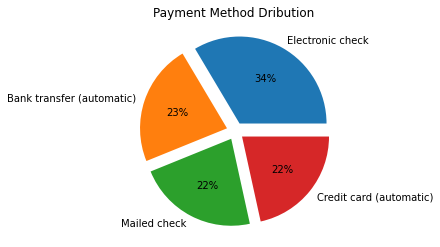

In [88]:
payment = df["PaymentMethod"].value_counts()
payment.plot.pie(explode=(0.1,0.1,0.1,0.1),autopct='%1.0f%%')
plt.title("Payment Method Dribution ")
plt.ylabel("")
plt.show()

In [97]:
#finding - most preferred mode of payment is Electronic check